In [52]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving Books_Data_Clean.csv to Books_Data_Clean (1).csv


In [16]:
df = pd.read_csv("Books_Data_Clean.csv")

In [17]:
print(df.head())

   index  Publishing Year                        Book Name  \
0      0           1975.0                          Beowulf   
1      1           1987.0                 Batman: Year One   
2      2           2015.0                Go Set a Watchman   
3      3           2008.0  When You Are Engulfed in Flames   
4      4           2011.0         Daughter of Smoke & Bone   

                                              Author language_code  \
0                             Unknown, Seamus Heaney         en-US   
1  Frank Miller, David Mazzucchelli, Richmond Lew...           eng   
2                                         Harper Lee           eng   
3                                      David Sedaris         en-US   
4                                       Laini Taylor           eng   

  Author_Rating  Book_average_rating  Book_ratings_count          genre  \
0        Novice                 3.42              155903  genre fiction   
1  Intermediate                 4.23              145267

In [18]:
print(df.shape)

(1070, 15)


In [20]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                1070 non-null   int64  
 1   Publishing Year      1069 non-null   float64
 2   Book Name            1047 non-null   object 
 3   Author               1070 non-null   object 
 4   language_code        1017 non-null   object 
 5   Author_Rating        1070 non-null   object 
 6   Book_average_rating  1070 non-null   float64
 7   Book_ratings_count   1070 non-null   int64  
 8   genre                1070 non-null   object 
 9   gross sales          1070 non-null   float64
 10  publisher revenue    1070 non-null   float64
 11  sale price           1070 non-null   float64
 12  sales rank           1070 non-null   int64  
 13  Publisher            1070 non-null   object 
 14  units sold           1070 non-null   int64  
dtypes: float64(5), int64(4), object(6)
mem

In [21]:
print(df.isnull().sum())

index                   0
Publishing Year         1
Book Name              23
Author                  0
language_code          53
Author_Rating           0
Book_average_rating     0
Book_ratings_count      0
genre                   0
gross sales             0
publisher revenue       0
sale price              0
sales rank              0
Publisher               0
units sold              0
dtype: int64


In [23]:
print(df[['Book_average_rating', 'units sold']].describe())

       Book_average_rating    units sold
count          1070.000000   1070.000000
mean              4.007000   9676.980374
std               0.247244  15370.571306
min               2.970000    106.000000
25%               3.850000    551.250000
50%               4.015000   3924.000000
75%               4.170000   5312.250000
max               4.770000  61560.000000


## 산점도 EDA

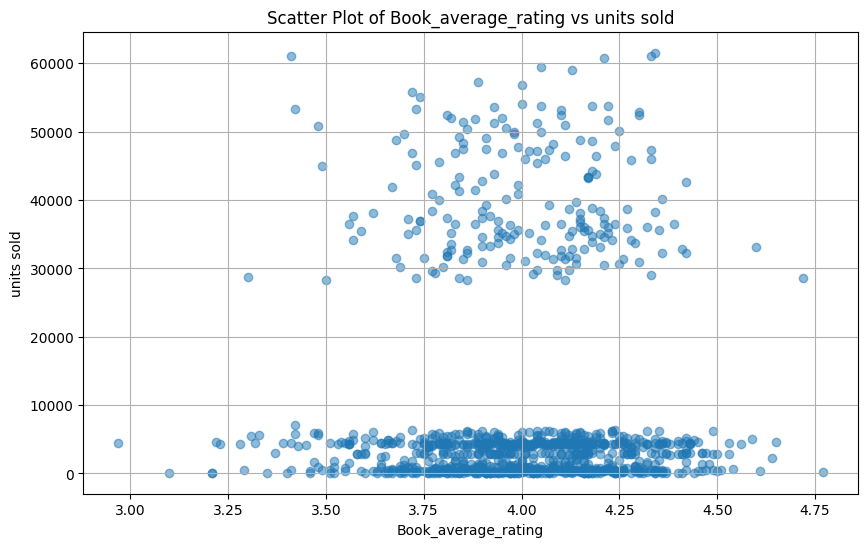

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['Book_average_rating'],df['units sold'],alpha=0.5)
plt.xlabel('Book_average_rating')
plt.ylabel('units sold')
plt.title('Scatter Plot of Book_average_rating vs units sold')
plt.grid(True)
plt.show()

## 상관계수

In [33]:
from scipy.stats import pearsonr

subset = df[['Book_average_rating','units sold']].dropna()
print(subset)
corr,p_value = pearsonr(subset['Book_average_rating'],subset['units sold'])

print(f"상관계수: {corr:.3f}")
print(f"p_value: {p_value:.5f}")

      Book_average_rating  units sold
0                    3.42        7000
1                    4.23        6250
2                    3.31        5500
3                    4.04        5500
4                    4.04        4750
...                   ...         ...
1065                 3.52         106
1066                 4.34         106
1067                 3.92         106
1068                 4.17         106
1069                 4.07         106

[1070 rows x 2 columns]
상관계수: -0.009
p_value: 0.78082


## 회귀분석

In [37]:
import statsmodels.api as sm
X = subset['Book_average_rating']
Y = subset['units sold']
X = sm.add_constant(X) # 절편 추가
model = sm.OLS(Y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             units sold   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.07746
Date:                Fri, 21 Mar 2025   Prob (F-statistic):              0.781
Time:                        07:10:00   Log-Likelihood:                -11833.
No. Observations:                1070   AIC:                         2.367e+04
Df Residuals:                    1068   BIC:                         2.368e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 1.18e+04   7

## 다중회귀분석

In [40]:
print(df.columns)

Index(['index', 'Publishing Year', 'Book Name', 'Author', 'language_code',
       'Author_Rating', 'Book_average_rating', 'Book_ratings_count', 'genre',
       'gross sales', 'publisher revenue', 'sale price', 'sales rank',
       'Publisher ', 'units sold'],
      dtype='object')


In [58]:
df = df.rename(columns=lambda x: x.strip())
column_types = df[['sale price', 'genre','Publisher']].dtypes
print(column_types)
unique_values = df[['sale price','genre','Publisher']].nunique()
print(unique_values)
column_summary = pd.DataFrame({
    'Column Name': df[['sale price', 'genre','Publisher']].columns,
    'Data Type': df[['sale price', 'genre','Publisher']].dtypes,
    'Unique Values': df[['sale price', 'genre','Publisher']].nunique()
})

print(column_summary)

sale price    float64
genre          object
Publisher      object
dtype: object
sale price    149
genre           4
Publisher       9
dtype: int64
           Column Name Data Type  Unique Values
sale price  sale price   float64            149
genre            genre    object              4
Publisher    Publisher    object              9


In [60]:
import patsy
import statsmodels.api as sm

columns_to_use = ['Book_average_rating','sale price','genre','Publisher','units sold']
subset=df[columns_to_use].dropna()

y, X = patsy.dmatrices("Q('units sold') ~ Q('Book_average_rating') + Q('sale price') + C(Q('genre')) + C(Q('Publisher'))",
                        data=subset, return_type="dataframe")

model = sm.OLS(y, X).fit()
print(model.summary())

print(X.columns)


                            OLS Regression Results                            
Dep. Variable:        Q('units sold')   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.8175
Date:                Fri, 21 Mar 2025   Prob (F-statistic):              0.642
Time:                        07:43:55   Log-Likelihood:                -11827.
No. Observations:                1070   AIC:                         2.368e+04
Df Residuals:                    1056   BIC:                         2.375e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                                                coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

# 머신러닝

## 선형 회귀 모델

In [69]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

columns_to_use = ['Book_average_rating','sale price','genre','Publisher','units sold'] # 필요한 변수
subset=df[columns_to_use].dropna() # 결측치 제거

subset = pd.get_dummies(subset, columns=['genre','Publisher'], drop_first=True)

X = subset.drop(columns=['units sold'])
y = subset['units sold']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R^2: {r2:.2f}")

MAE: 11813.11
MSE: 252370601.10
RMSE: 15886.18
R^2: -0.04
